In [1]:
import sys
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
import pandas as pd
import numpy as np
from os.path import join
import os
from util import convert_bbox_minmax_to_cent_xywh, get_timestamp

importing Jupyter notebook from util.ipynb


In [11]:
%matplotlib inline

In [2]:
def grab_box_coords_for_timestep(fname, label_df, time_step):
        ts = get_timestamp(fname)
        
        final_df=label_df.ix[ (label_df.month==ts.month) &
                      (label_df.day==ts.day) & 
                      (label_df.year==ts.year) &
                       (label_df.time_step == time_step)].copy()
        final_df = final_df[ ["xmin", "xmax", "ymin", "ymax","category"]]
        return final_df


In [3]:
def make_labels_for_dataset(fname, labels_csv_file, time_steps_per_file=8):
    '''takes in netcdf file and csv label file and outputs list of array of box coordinates for each time step '''
    label_df = pd.read_csv(labels_csv_file)
    box_list = []
    for time_step in range(time_steps_per_file)[::2]:
        box_df = grab_box_coords_for_timestep(fname,label_df, time_step)
        boxes = np.asarray(box_df)
        boxes = convert_bbox_minmax_to_cent_xywh(boxes)
        box_list.append(boxes)
    return box_list

In [4]:
clim = pd.read_csv("/home/evan/data/climate/climo/csv_labels/labels.csv")

In [8]:
df = clim["category"]

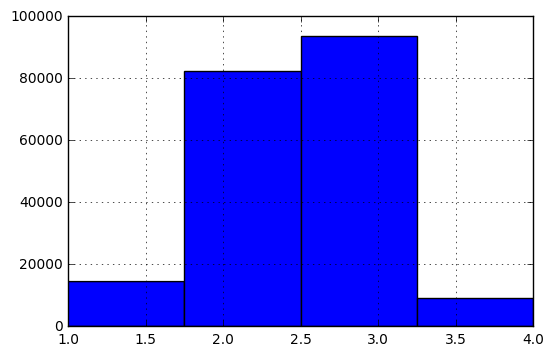

In [12]:
df.hist(bins=4,)

In [13]:
df.hist?